In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
# from sklearn.decomposition import TruncatedSVD

In [59]:
data = pd.read_csv('C:/Users/Dell/OneDrive/Desktop/Harvesting/data_harvesting_final (1).csv')

In [60]:
data = data.drop('Unnamed: 0', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79258 entries, 0 to 79257
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_date        79258 non-null  object
 1   purchase_pincode  79258 non-null  int64 
 2   item              79258 non-null  object
 3   quantity_ordered  79258 non-null  int64 
 4   sales_count       79258 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 3.0+ MB


In [61]:
data.head()

,order_date,purchase_pincode,item,quantity_ordered,sales_count
0,2018-01-01,110001,almond,7,6
1,2018-01-01,110001,ghee,41,7
2,2018-01-01,110001,ginger,111,9
3,2018-01-01,110001,mango,69,4
4,2018-01-01,110001,soybean,18,1


In [103]:
data.tail()

,order_date,purchase_pincode,item,quantity_ordered,sales_count
79253,2020-12-31,700001,chilli,6,1
79254,2020-12-31,700001,guava,20,3
79255,2020-12-31,700001,litchi,45,3
79256,2020-12-31,803101,almond,4,2
79257,2020-12-31,803101,cherry,2,2


In [62]:
#data = data.set_index('order_date')
#data

In [63]:
data.shape

(79258, 5)

## Total quantity of each item

In [64]:
popular_products1 = pd.DataFrame(data.groupby('item')['quantity_ordered'].sum())
total_quantity_per_item = popular_products1.sort_values('quantity_ordered', ascending=False)
total_quantity_per_item

,quantity_ordered
item,
rice,871550
potato,525834
mango,289735
onion,268003
soybean,211430
litchi,201452
ginger,171717
ghee,100398
apple,90399


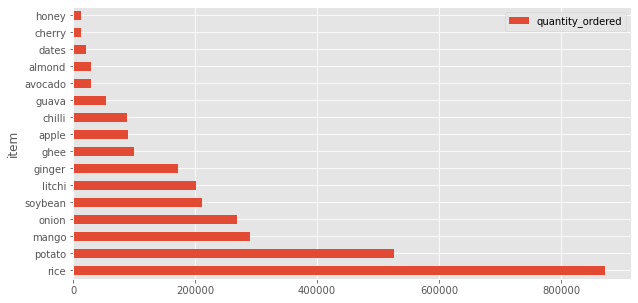

In [65]:
total_quantity_per_item.plot(kind = "barh", figsize=(10,5))

## Total sales of each item

In [124]:
popular_products1 = pd.DataFrame(data.groupby('item')['sales_count'].sum())
total_sales_per_item = popular_products1.sort_values('sales_count', ascending=False)
total_sales_per_item

,sales_count
item,
almond,18918
ghee,16710
mango,14850
soybean,14543
ginger,14319
litchi,13897
cherry,13257
apple,12914
chilli,12708


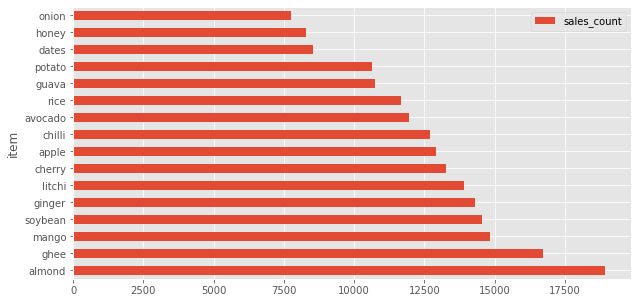

In [125]:
total_sales_per_item.plot(kind = "barh", figsize=(10,5))

## Mean value of quantity of each item for a particular pincode

In [112]:
df_matrix1 = pd.pivot_table(data, values='quantity_ordered', index='purchase_pincode', columns='item')
df_matrix1

item,almond,apple,avocado,cherry,chilli,dates,ghee,ginger,guava,honey,litchi,mango,onion,potato,rice,soybean
purchase_pincode,,,,,,,,,,,,,,,,
110001,7.467116,23.125203,7.636800,2.658442,22.437194,6.166667,24.415781,51.735010,13.210361,4.080679,44.652738,66.296852,97.660508,123.636228,233.281090,45.046133
140411,3.964706,12.408759,4.254118,1.557957,12.921525,3.681818,12.787330,26.160665,7.629268,2.301538,25.189873,39.346241,54.496622,74.210145,135.300248,26.178495
208001,6.093750,18.303293,6.342105,2.270655,18.526224,5.630108,19.554455,43.104082,11.246957,3.524038,37.131746,56.009600,77.954082,105.937824,193.892791,37.172911
400001,8.690878,24.362480,8.685065,2.827417,23.662558,7.170055,25.351391,57.733209,14.288786,4.480808,49.841379,73.375362,110.123570,142.762048,252.848837,49.191799
411001,5.295585,16.535316,5.693798,2.019939,16.190299,4.877273,17.255282,38.441704,10.095764,2.932642,31.813758,50.932743,75.946092,91.033989,170.443515,33.097134
462001,3.084932,11.046512,3.810559,1.317618,10.422096,3.263598,10.547170,21.931818,6.982818,2.045455,21.917333,31.358974,47.401786,65.109718,112.415808,21.912596
560001,6.780822,21.069079,7.241877,2.406623,20.013333,6.220441,22.427673,45.172345,11.876847,3.748359,41.067064,62.685535,85.549528,116.682663,215.538043,40.555085
600001,4.575258,14.994048,4.964912,1.730051,14.198770,4.301047,14.940727,33.252983,9.072765,2.617729,30.239488,42.651163,62.518750,83.937634,150.090336,29.147482
700001,5.398000,16.388994,5.831373,2.013889,15.813084,4.662708,17.305755,36.502242,10.051429,3.072993,33.075125,51.557169,72.928775,95.740672,164.362764,34.198675


## Mean value of sales for each item for a particular pincode

In [69]:
df_matrix2 = pd.pivot_table(data, values='sales_count', index='purchase_pincode', columns='item')
df_matrix2

item,almond,apple,avocado,cherry,chilli,dates,ghee,ginger,guava,honey,litchi,mango,onion,potato,rice,soybean
purchase_pincode,,,,,,,,,,,,,,,,
110001,4.979764,3.323577,3.030400,2.658442,3.207178,2.521569,4.009105,4.350097,2.604396,2.777070,3.061960,3.394303,2.849885,2.504491,3.119250,3.082768
140411,2.663529,1.771290,1.701176,1.557957,1.825112,1.457576,2.165158,2.180055,1.529268,1.553846,1.746835,2.029613,1.557432,1.492754,1.816377,1.806452
208001,4.045956,2.622184,2.503759,2.270655,2.641608,2.270968,3.250825,3.546939,2.245217,2.317308,2.566667,2.883200,2.288265,2.143351,2.600739,2.572046
400001,5.797297,3.453100,3.465909,2.827417,3.399076,2.865065,4.244510,4.772388,2.864823,3.016162,3.459310,3.801449,3.183066,2.890060,3.375415,3.371693
411001,3.522073,2.349442,2.348837,2.019939,2.305970,1.934091,2.897887,3.181614,2.025783,1.950777,2.184564,2.576991,2.202156,1.840787,2.297071,2.265924
462001,2.060274,1.569767,1.549689,1.317618,1.484419,1.305439,1.773585,1.831169,1.388316,1.395455,1.512000,1.612536,1.366071,1.316614,1.501718,1.508997
560001,4.517123,3.027961,2.868231,2.406623,2.868333,2.404810,3.724843,3.811623,2.390805,2.501094,2.824143,3.188679,2.464623,2.354489,2.898551,2.807910
600001,3.037113,2.128968,1.995614,1.730051,2.032787,1.753927,2.487572,2.775656,1.817048,1.745152,2.087751,2.203488,1.796875,1.696774,1.993697,2.007194
700001,3.564000,2.345351,2.305882,2.013889,2.265421,1.893112,2.859712,3.080717,2.000000,2.065693,2.282137,2.637024,2.091168,1.938433,2.213052,2.354305


In [70]:
#df_matrix1.plot(kind='barh', figsize=(20,20))

In [110]:
# correlation_matrix = np.corrcoef(df_matrix)
# correlation_matrix.shape
data.corr()

,purchase_pincode,quantity_ordered,sales_count
purchase_pincode,1.000000,-0.052342,-0.10729
quantity_ordered,-0.052342,1.000000,0.38852
sales_count,-0.107290,0.388520,1.00000


In [109]:
#viz = pd.DataFrame(data.groupby('order_date')['purchase_pincode'])
#viz

## Plotting quantity ordered for Almond 

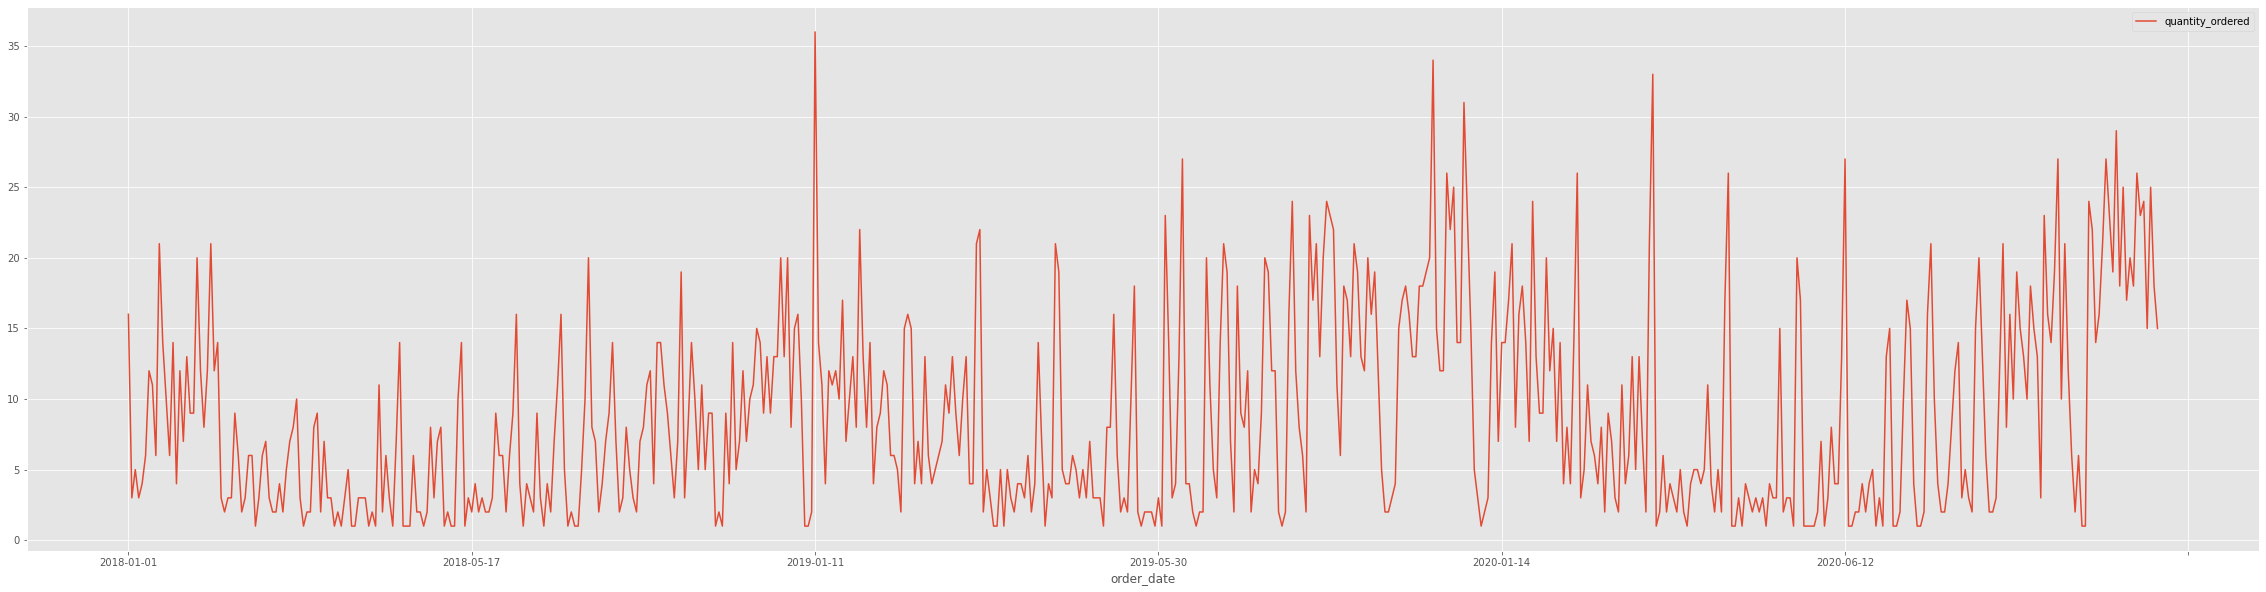

In [107]:
data_almond = data[(data['purchase_pincode'] == 400001) & (data['item'] == 'almond')]
data_almond.plot(x='order_date', y = 'quantity_ordered', figsize = (40,10))
plt.show()

## Plotting sales count for Almond 

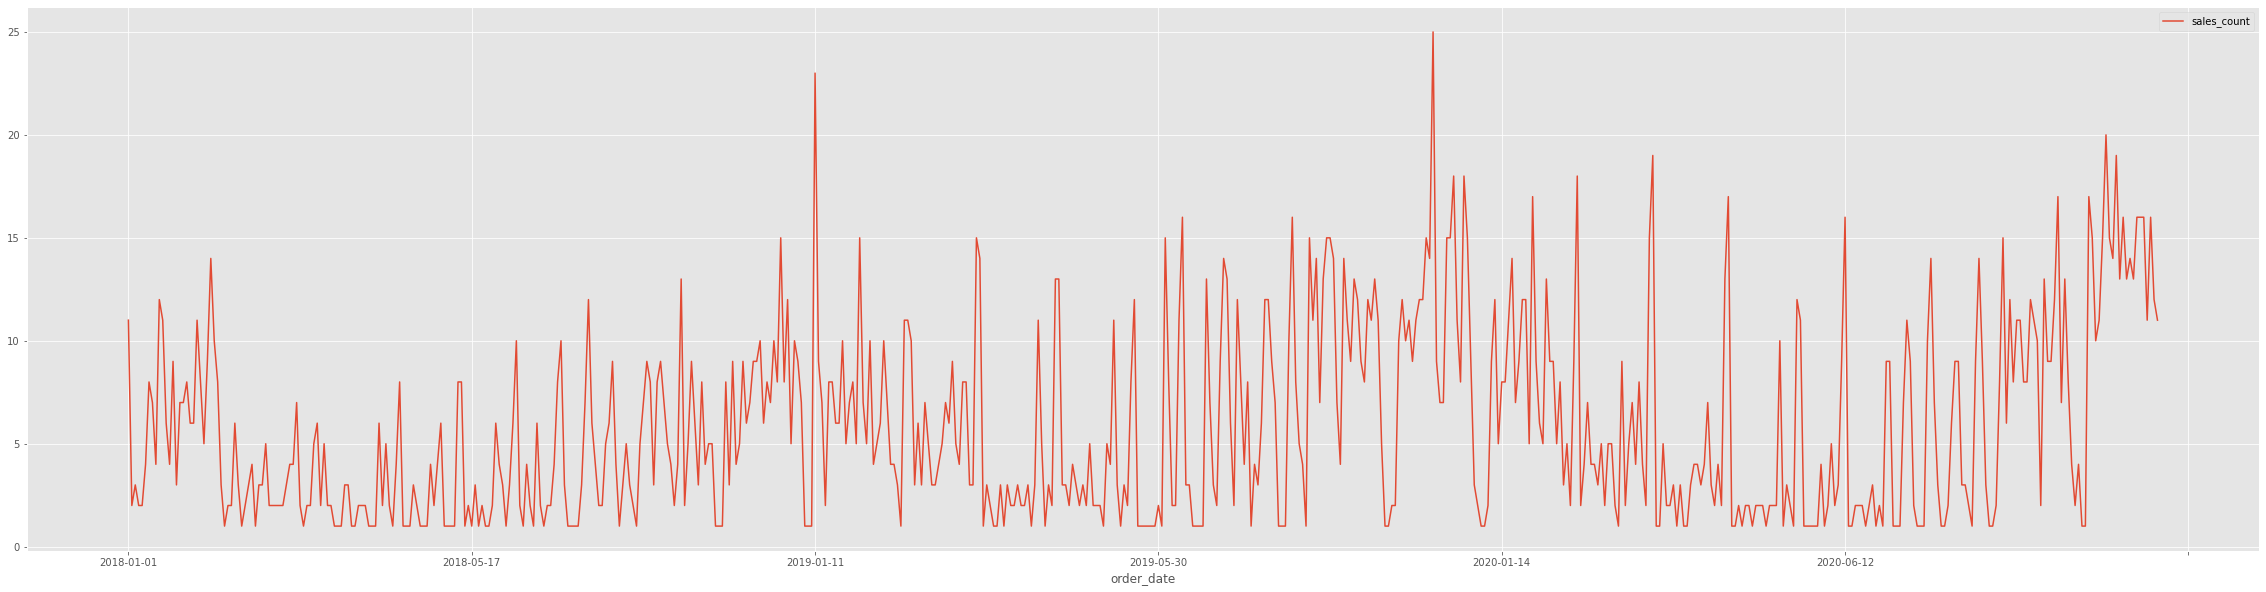

In [108]:
data_almond = data[(data['purchase_pincode'] == 400001) & (data['item'] == 'almond')]
data_almond.plot(x='order_date', y='sales_count', figsize = (40,10))
plt.show()

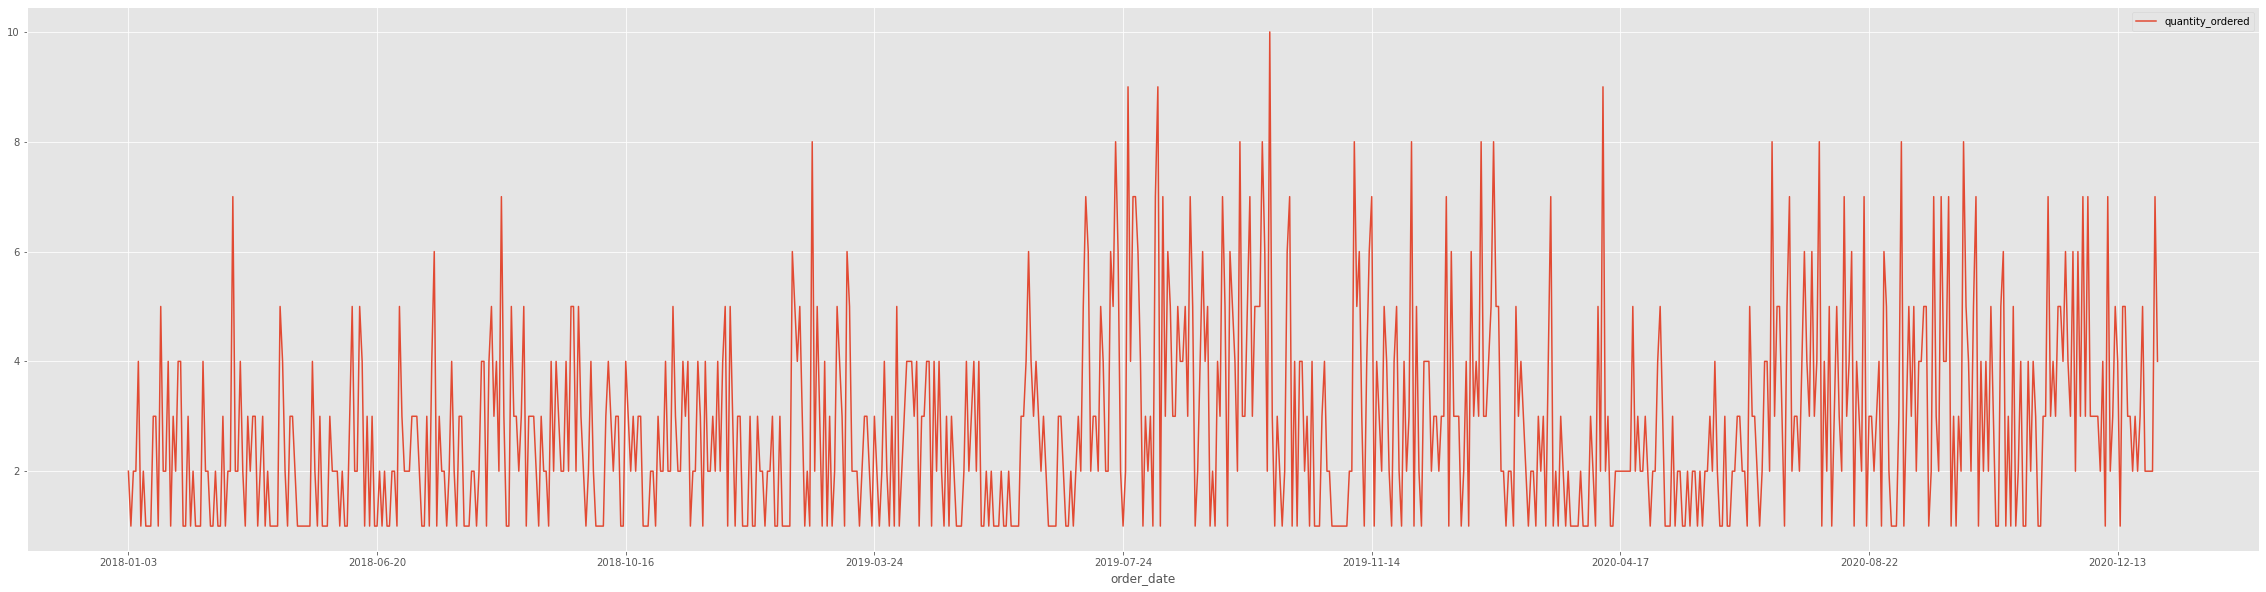

In [104]:
data_cherry = data[(data['purchase_pincode'] == 400001) & (data['item'] == 'cherry')] 
data_cherry.plot(x='order_date', y = 'quantity_ordered', figsize = (40,10))
plt.show()

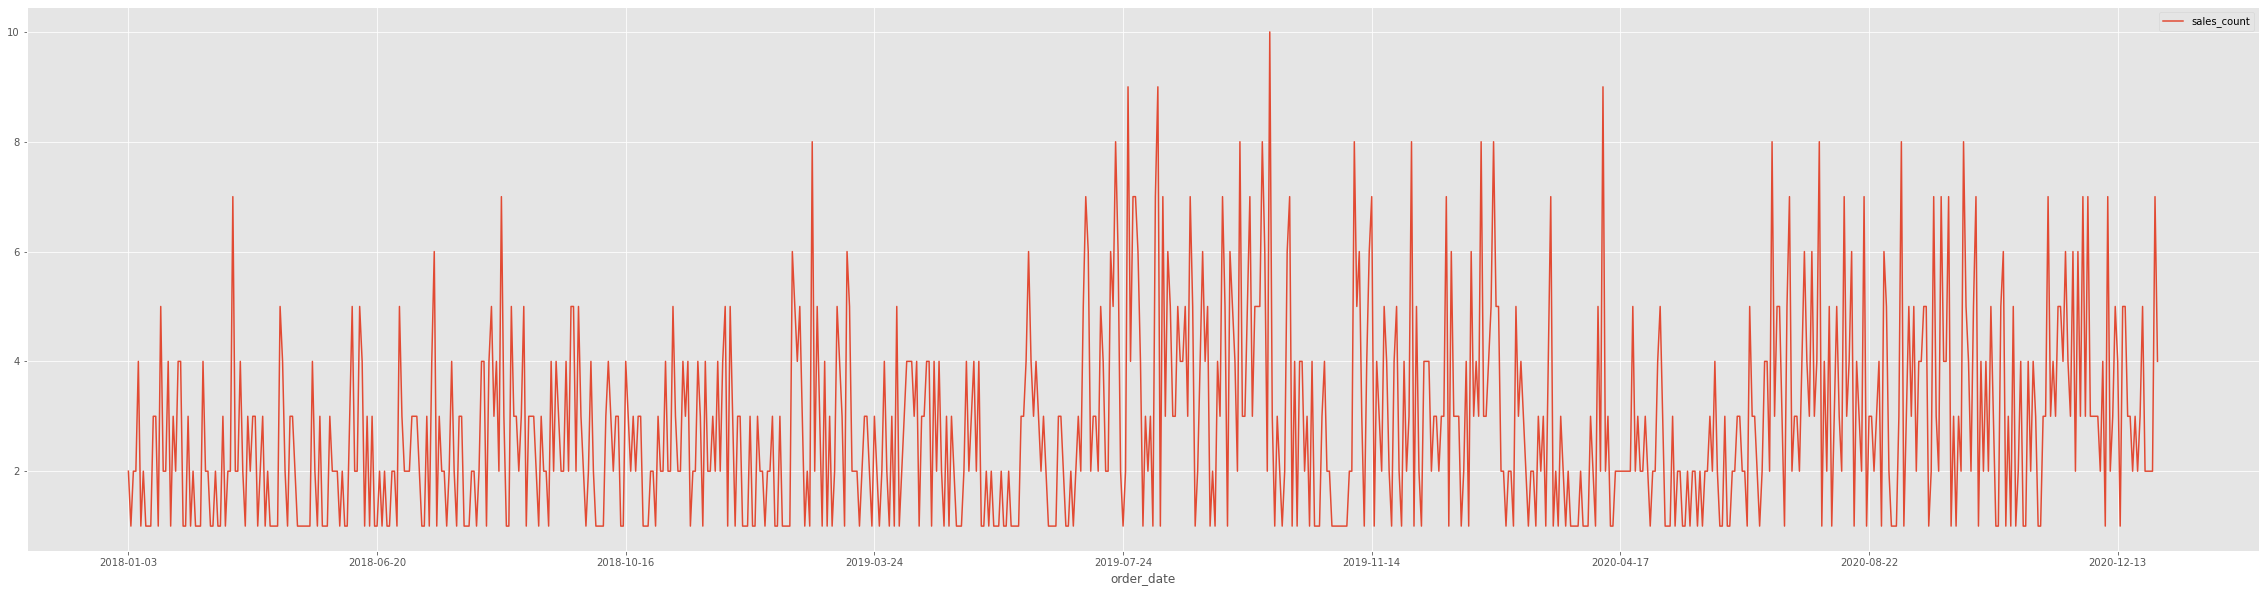

In [126]:
data_cherry = data[(data['purchase_pincode'] == 400001) & (data['item'] == 'cherry')]
data_cherry.plot(x='order_date', y='sales_count', figsize = (40,10))
plt.show()

## Normalizing

In [128]:
data['order_date'] = pd.to_datetime(data['order_date'])

In [129]:
data1 = data.groupby([data['order_date'].apply(lambda x: x.strftime('%Y-%m')),'purchase_pincode','item']).sum().reset_index()
data1

,order_date,purchase_pincode,item,quantity_ordered,sales_count
0,2018-01,110001,almond,210,144
1,2018-01,110001,apple,111,16
2,2018-01,110001,avocado,46,19
3,2018-01,110001,cherry,12,12
4,2018-01,110001,chilli,179,25
...,...,...,...,...,...
5750,2020-12,803101,mango,119,5
5751,2020-12,803101,onion,71,2
5752,2020-12,803101,potato,170,4
5753,2020-12,803101,rice,247,3


In [130]:
monthly_piv = data.pivot_table(index=['purchase_pincode','item'], columns = 'order_date', values = 'quantity_ordered',fill_value = 0,aggfunc= 'sum').reset_index()
monthly_piv

order_date,purchase_pincode,item,2018-01-01 00:00:00,2018-01-02 00:00:00,2018-01-03 00:00:00,2018-01-04 00:00:00,2018-01-05 00:00:00,2018-01-06 00:00:00,2018-01-07 00:00:00,2018-01-08 00:00:00,...,2020-12-22 00:00:00,2020-12-23 00:00:00,2020-12-24 00:00:00,2020-12-25 00:00:00,2020-12-26 00:00:00,2020-12-27 00:00:00,2020-12-28 00:00:00,2020-12-29 00:00:00,2020-12-30 00:00:00,2020-12-31 00:00:00
0,110001,almond,7,1,3,0,0,2,0,0,...,20,16,11,15,13,15,21,11,12,17
1,110001,apple,0,0,0,0,8,9,0,20,...,38,38,46,6,26,5,34,28,9,8
2,110001,avocado,0,14,12,6,2,2,4,1,...,0,0,0,0,0,0,0,0,0,0
3,110001,cherry,0,0,2,0,1,1,2,0,...,4,4,1,4,2,3,4,3,4,4
4,110001,chilli,0,0,0,0,22,17,12,12,...,7,23,14,0,23,18,18,14,8,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,803101,mango,0,35,42,70,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
156,803101,onion,0,0,0,67,43,44,0,0,...,0,0,0,0,0,0,0,0,0,0
157,803101,potato,0,0,0,0,0,0,0,88,...,0,0,0,0,0,0,0,0,0,0
158,803101,rice,0,0,0,84,95,0,0,87,...,0,0,0,0,0,0,0,0,0,0


In [131]:
monthly_piv1 = monthly_piv.drop(['purchase_pincode', 'item'], axis = 1)
#monthly_piv1.max(axis=1)
monthly_piv_norm = monthly_piv1.div(monthly_piv1.max(axis=1), axis=0)
monthly_piv_norm

order_date,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08,2018-01-09,2018-01-10,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
0,0.233333,0.033333,0.100000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,...,0.666667,0.533333,0.366667,0.500000,0.433333,0.500000,0.700000,0.366667,0.400000,0.566667
1,0.000000,0.000000,0.000000,0.000000,0.096386,0.108434,0.000000,0.240964,0.361446,0.240964,...,0.457831,0.457831,0.554217,0.072289,0.313253,0.060241,0.409639,0.337349,0.108434,0.096386
2,0.000000,0.350000,0.300000,0.150000,0.050000,0.050000,0.100000,0.025000,0.125000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.181818,0.000000,0.090909,0.090909,0.181818,0.000000,0.181818,0.090909,...,0.363636,0.363636,0.090909,0.363636,0.181818,0.272727,0.363636,0.272727,0.363636,0.363636
4,0.000000,0.000000,0.000000,0.000000,0.278481,0.215190,0.151899,0.151899,0.101266,0.607595,...,0.088608,0.291139,0.177215,0.000000,0.291139,0.227848,0.227848,0.177215,0.101266,0.544304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.000000,0.246479,0.295775,0.492958,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
156,0.000000,0.000000,0.000000,0.256705,0.164751,0.168582,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
157,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.444444,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
158,0.000000,0.000000,0.000000,0.193995,0.219400,0.000000,0.000000,0.200924,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [136]:
monthly_piv_norm['purchase_pincode'] = monthly_piv['purchase_pincode']
monthly_piv_norm['item'] = monthly_piv['item']

In [139]:
monthly_piv_norm

order_date,2018-01-01 00:00:00,2018-01-02 00:00:00,2018-01-03 00:00:00,2018-01-04 00:00:00,2018-01-05 00:00:00,2018-01-06 00:00:00,2018-01-07 00:00:00,2018-01-08 00:00:00,2018-01-09 00:00:00,2018-01-10 00:00:00,...,2020-12-24 00:00:00,2020-12-25 00:00:00,2020-12-26 00:00:00,2020-12-27 00:00:00,2020-12-28 00:00:00,2020-12-29 00:00:00,2020-12-30 00:00:00,2020-12-31 00:00:00,purchase_pincode,item
0,0.233333,0.033333,0.100000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,...,0.366667,0.500000,0.433333,0.500000,0.700000,0.366667,0.400000,0.566667,110001,almond
1,0.000000,0.000000,0.000000,0.000000,0.096386,0.108434,0.000000,0.240964,0.361446,0.240964,...,0.554217,0.072289,0.313253,0.060241,0.409639,0.337349,0.108434,0.096386,110001,apple
2,0.000000,0.350000,0.300000,0.150000,0.050000,0.050000,0.100000,0.025000,0.125000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,110001,avocado
3,0.000000,0.000000,0.181818,0.000000,0.090909,0.090909,0.181818,0.000000,0.181818,0.090909,...,0.090909,0.363636,0.181818,0.272727,0.363636,0.272727,0.363636,0.363636,110001,cherry
4,0.000000,0.000000,0.000000,0.000000,0.278481,0.215190,0.151899,0.151899,0.101266,0.607595,...,0.177215,0.000000,0.291139,0.227848,0.227848,0.177215,0.101266,0.544304,110001,chilli
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.000000,0.246479,0.295775,0.492958,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,803101,mango
156,0.000000,0.000000,0.000000,0.256705,0.164751,0.168582,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,803101,onion
157,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.444444,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,803101,potato
158,0.000000,0.000000,0.000000,0.193995,0.219400,0.000000,0.000000,0.200924,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,803101,rice


Input should be -     
1) pincode entered by buyer     
2) date recognised by the system or can be entered manually

Then on this basis..     
Data of last 30 days of current date entered should be considered to recommend items on that day of search

### Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if any product which is usually bought by every new user then there are chances that it may suggest that item to the user who just signed up.


# Extract last 30 days data from date e.g. 8/24/2019 ??

In [75]:
#data = data.set_index('order_date')

In [76]:
sub_data = data.loc[(data['order_date'] <= '2019-08-24') & (data['order_date'] >= '2019-07-24') & (data['purchase_pincode'] == 400001) ]
sub_data

,order_date,purchase_pincode,item,quantity_ordered,sales_count
39932,2019-07-24,400001,apple,5,1
39933,2019-07-24,400001,avocado,9,4
39934,2019-07-24,400001,cherry,1,1
39935,2019-07-24,400001,chilli,5,1
39936,2019-07-24,400001,dates,15,5
...,...,...,...,...,...
42667,2019-08-24,400001,litchi,79,5
42668,2019-08-24,400001,mango,23,1
42669,2019-08-24,400001,potato,382,8
42670,2019-08-24,400001,rice,263,4


In [77]:
sort_data = sub_data.sort_values('quantity_ordered', ascending=False)
sort_data.head(30)

,order_date,purchase_pincode,item,quantity_ordered,sales_count
41451,2019-08-10,400001,rice,615,8
42486,2019-08-22,400001,rice,558,7
42396,2019-08-21,400001,rice,507,7
41370,2019-08-09,400001,rice,430,6
41742,2019-08-14,400001,rice,402,5
40061,2019-07-25,400001,potato,401,8
42669,2019-08-24,400001,potato,382,8
41650,2019-08-13,400001,rice,353,5
40545,2019-07-30,400001,potato,347,7
41369,2019-08-09,400001,potato,314,6


In [78]:
grouped = pd.DataFrame(sort_data.groupby('item')['quantity_ordered'].count())
grouped

,quantity_ordered
item,
almond,5
apple,27
avocado,21
cherry,28
chilli,27
dates,24
ghee,24
ginger,12
guava,26


In [79]:
ranked = grouped.sort_values('quantity_ordered', ascending=False)
ranked

,quantity_ordered
item,
cherry,28
litchi,28
apple,27
chilli,27
guava,26
potato,25
rice,25
dates,24
ghee,24


Text(0.5, 1.0, 'Recommended items')

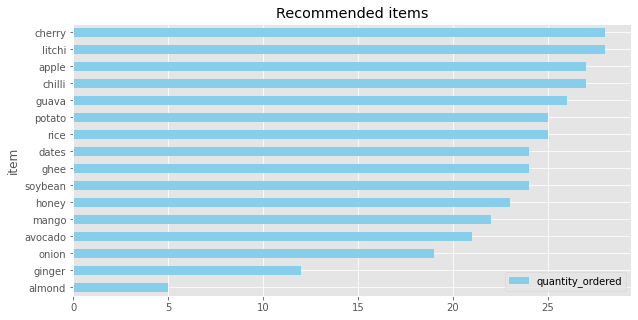

In [80]:
ranked.plot(kind = "barh", figsize=(10,5),color='skyblue')
plt.gca().invert_yaxis()
plt.title("Recommended items")